In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

(336, 512, 3)

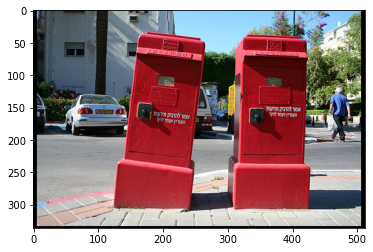

In [2]:
img_BGR = cv2.imread('example_image.jpeg') ## this is in BGR
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
img_RGB = cv2.copyMakeBorder(img_RGB, top=0, bottom=3, left=6, right=6, borderType=cv2.BORDER_CONSTANT, value = 0)
plt.imshow(img_RGB)
img_RGB.shape

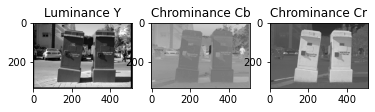

In [3]:
## alternative 1: use formula
def rgb2ycbcr(img_RGB):
    img_RGB = img_RGB/256.
    transform = np.array([[65.481, 128.553, 24.996], [-37.797, -74.203, 112], [112, -93.786, -18.214]])
    ycbcr = img_RGB.dot(transform.T) + np.array([16, 128, 128])
    return np.uint8(ycbcr)
img_YCbCr = rgb2ycbcr(img_RGB)
plt.subplot(2,3,1)
plt.imshow(img_YCbCr[:,:,0],cmap="gray")
plt.title('Luminance Y')
plt.subplot(2,3,2)
plt.imshow(img_YCbCr[:,:,1],cmap="gray")
plt.title('Chrominance Cb')
plt.subplot(2,3,3)
plt.imshow(img_YCbCr[:,:,2],cmap="gray")
plt.title('Chrominance Cr')
plt.show()

<img src="fig/subsampling.png" width="300">

In [4]:
def chroma_subsample_420(YCbCr): 
    out = YCbCr.copy()
    
    ## Cb 
    # Vertically, every second element equals to element above itself.
    out[1::2, :, 1] = out[::2, :, 1]
    # Horizontally, every second element equals to the element on its left side.
    out[:, 1::2, 1] = out[:, ::2, 1]
    
    ## Cr
    # Vertically, every second element equals to element above itself.
    out[1::2, :, 2] = out[::2, :, 2]
    # Horizontally, every second element equals to the element on its left side.
    out[:, 1::2, 2] = out[:, ::2, 2]
    
    return out

def chroma_subsample_422(YCbCr):
    out = YCbCr.copy()
    
    ## Cb 
    # Horizontally, every second element equals to the element on its left side.
    out[:, 1::2, 1] = out[:, ::2, 1]
    
    ## Cr
    # Horizontally, every second element equals to the element on its left side.
    out[:, 1::2, 2] = out[:, ::2, 2]
    
    return out


In [5]:
A = np.random.randint(20, size = [8,8,3]) # 4:4:4
print(A[:,:,2])
print(chroma_subsample_420(A)[:,:,2])
print(chroma_subsample_422(A)[:,:,2])

[[18 11 16 18 14 19  9 15]
 [14  8 10  4  0 17  7 14]
 [ 7  0  5 14  5  6 11  2]
 [ 3 11 16  9 15 18 13  5]
 [ 5 10 17 14 15 17 18  2]
 [ 7 12 15  3 11  4  4  1]
 [11  8 12  7 10  7  0 15]
 [ 4  0 16 11 19 19 14 16]]
[[18 18 16 16 14 14  9  9]
 [18 18 16 16 14 14  9  9]
 [ 7  7  5  5  5  5 11 11]
 [ 7  7  5  5  5  5 11 11]
 [ 5  5 17 17 15 15 18 18]
 [ 5  5 17 17 15 15 18 18]
 [11 11 12 12 10 10  0  0]
 [11 11 12 12 10 10  0  0]]
[[18 18 16 16 14 14  9  9]
 [14 14 10 10  0  0  7  7]
 [ 7  7  5  5  5  5 11 11]
 [ 3  3 16 16 15 15 13 13]
 [ 5  5 17 17 15 15 18 18]
 [ 7  7 15 15 11 11  4  4]
 [11 11 12 12 10 10  0  0]
 [ 4  4 16 16 19 19 14 14]]


In [6]:
img_420 = chroma_subsample_420(img_YCbCr)
MSE = ((img_420 - img_YCbCr)**2).mean()
print('MSE for subsample_420', MSE)

MSE for subsample_420 7.744035993303571


In [7]:
img_422 = chroma_subsample_422(img_YCbCr)
MSE = ((img_422 - img_YCbCr)**2).mean()
print('MSE for subsample_422', MSE)

MSE for subsample_422 4.347291976686508
